### Linear Regression with One Variable

*First some context on the problem statement.*

*Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.*

+ The first column is the population of a city.
+ the second column is the profit of a food truck in that city.
+ A negative value for profit indicates a loss.

 **import certain libraries.**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Reading and Plotting the data**

In [39]:
data = pd.read_csv('ex1data1.txt', header = None)          # read from dataset
X = data.iloc[:,0]                                       # read first column
y = data.iloc[:,1]                                     # read second column
m = len(y)                                           # number of training examples
data.head()                                        # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


*Here we used the pandas read_csv function to read the comma separated values. Also, we have used the head function to view the first few rows of our data.*

**Visualize the data**

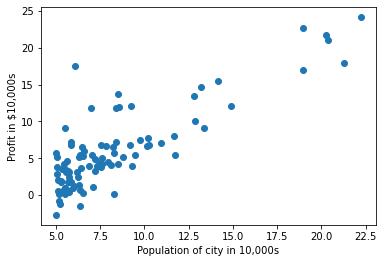

In [40]:
plt.scatter(X, y)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

**Adding the intercept term**

*To convert rank 1 to rank 2 array we use **someArray[:,np.newaxis]**. 
 When operating on arrays its good to convert rank 1 arrays to rank 2 arrays because rank 1 arrays often give unexpected results.*

In [41]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2, 1])
iterations = 1500
alpha = 0.001
ones = np.ones((m, 1))
X = np.hstack((ones, X))       # adding the intercept term

**Computing the cost**

In [42]:
def computeCost(X, y, theta):
    
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2 * m)

In [43]:
J = computeCost(X, y, theta)
print(J)

32.072733877455676


**Finding the optimal parameters using Gradient Descent**

In [62]:
def gradientDescent(X, y, theta, alpha, iterations):
    for peach in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha / m) * temp
    return theta    

In [63]:
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.62970773]
 [ 1.16630371]]


In [64]:
J = computeCost(X, y, theta)
print(J)

4.483416504288282


**Plot showing the best fit line**

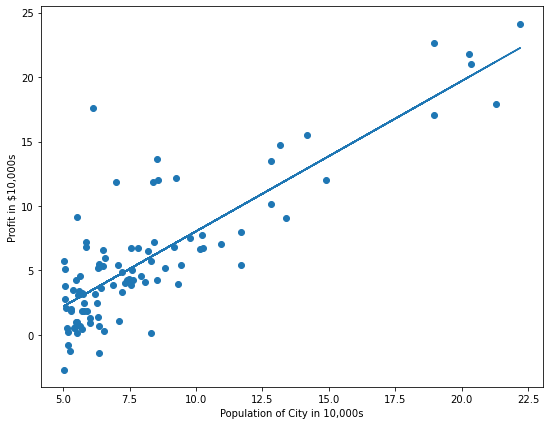

In [71]:
plt.figure(figsize = (9, 7))
plt.scatter(X[:, 1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:, 1], np.dot(X, theta))
plt.show()

### Linear Regression with multiple variables

Problem context:
    
*Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.*

*The file ex1data2.txt ((available under week 2’s assignment material)) contains a training set of housing prices in Portland, Oregon.*
+ The first column is the **size of the house** (in square feet),
+ the second column is the **number of bedrooms**, and
+ the third column is the **price of the house**.

In [84]:
import numpy as np
import pandas as pd

data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
X = data.iloc[:,0:2]                    # read first two columns into X
y = data.iloc[:,2]                     # read the third column into y
m = len(y)                            # no. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**Feature Normalization**

Our task here is to:
+ Subtract the mean value of each feature from the dataset.
+ After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [85]:
X = (X - np.mean(X)) / np.std(X)

**Adding the intercept term and initializing parameters**

In [87]:

y = y[:,np.newaxis]
theta = np.zeros((3,1))
ones = np.ones((m,1))
alpha = 0.01
num_iters = 400
X = np.hstack((ones, X))       # adding the intercept term

**Computing the cost**

In [88]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2 * m)

In [89]:
J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


**Finding the optimal parameters using Gradient Descent**

In [90]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for peach in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha / m) * temp
    return theta    

In [91]:
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [92]:
J = computeCostMulti(X, y, theta)
print(J)

2105448288.6292474


This should give you a value of 2105448288.6292474 which is much better than 65591548106.45744